In [89]:
import pandas as pd
import matplotlib.pyplot as plt

In [90]:
files = [
    '/kaggle/input/bike-usage-prediction/364JourneyDataExtract03Apr2023-09Apr2023.csv',
    '/kaggle/input/bike-usage-prediction/365JourneyDataExtract10Apr2023-16Apr2023.csv',
    '/kaggle/input/bike-usage-prediction/366JourneyDataExtract17Apr2023-23Apr2023.csv',
    '/kaggle/input/bike-usage-prediction/367JourneyDataExtract24Apr2023-30Apr2023.csv'
]

In [91]:
data_frames = [pd.read_csv(file) for file in files]
data1 = pd.concat(data_frames, ignore_index=True)

**Data Preprocessing**

In [92]:
data1.head()

,Number,Start date,Start station number,Start station,End date,End station number,End station,Bike number,Bike model,Total duration,Total duration (ms)
0,129755564,2023-04-09 23:59,1054,"East Road, Hoxton",2023-04-10 00:12,300031,"Islington Green, Angel",58906,CLASSIC,13m 18s,798660
1,129755565,2023-04-09 23:59,200039,"Sail Street, Vauxhall",2023-04-10 00:13,200039,"Sail Street, Vauxhall",59510,CLASSIC,13m 52s,832949
2,129755566,2023-04-09 23:59,1071,"Tower Gardens , Tower",2023-04-10 00:18,2690,"City Road, Angel",54082,CLASSIC,19m 11s,1151358
3,129755556,2023-04-09 23:58,300092,"Hertford Road, De Beauvoir Town",2023-04-10 00:08,1131,"Graham Street, Angel",23273,CLASSIC,10m 48s,648713
4,129755557,2023-04-09 23:58,2691,"Howland Street, Fitzrovia",2023-04-10 00:00,3497,"Rathbone Street, Fitzrovia",54927,CLASSIC,2m 22s,142395


In [93]:
data1.shape

(611059, 11)

In [94]:
data1.isnull().sum()

Number                  0
Start date              0
Start station number    0
Start station           0
End date                0
End station number      0
End station             0
Bike number             0
Bike model              0
Total duration          0
Total duration (ms)     0
dtype: int64

In [95]:
data1.isna().sum()

Number                  0
Start date              0
Start station number    0
Start station           0
End date                0
End station number      0
End station             0
Bike number             0
Bike model              0
Total duration          0
Total duration (ms)     0
dtype: int64

In [96]:
data1.dtypes

Number                   int64
Start date              object
Start station number     int64
Start station           object
End date                object
End station number       int64
End station             object
Bike number              int64
Bike model              object
Total duration          object
Total duration (ms)      int64
dtype: object

**Daily Bike Usage Trends**

In [97]:
# Convert 'Start date' to datetime format
data1['Start date'] = pd.to_datetime(data1['Start date'])
# Extract the date from 'Start date' and count daily rides
daily_counts = data1['Start date'].dt.date.value_counts().sort_index()

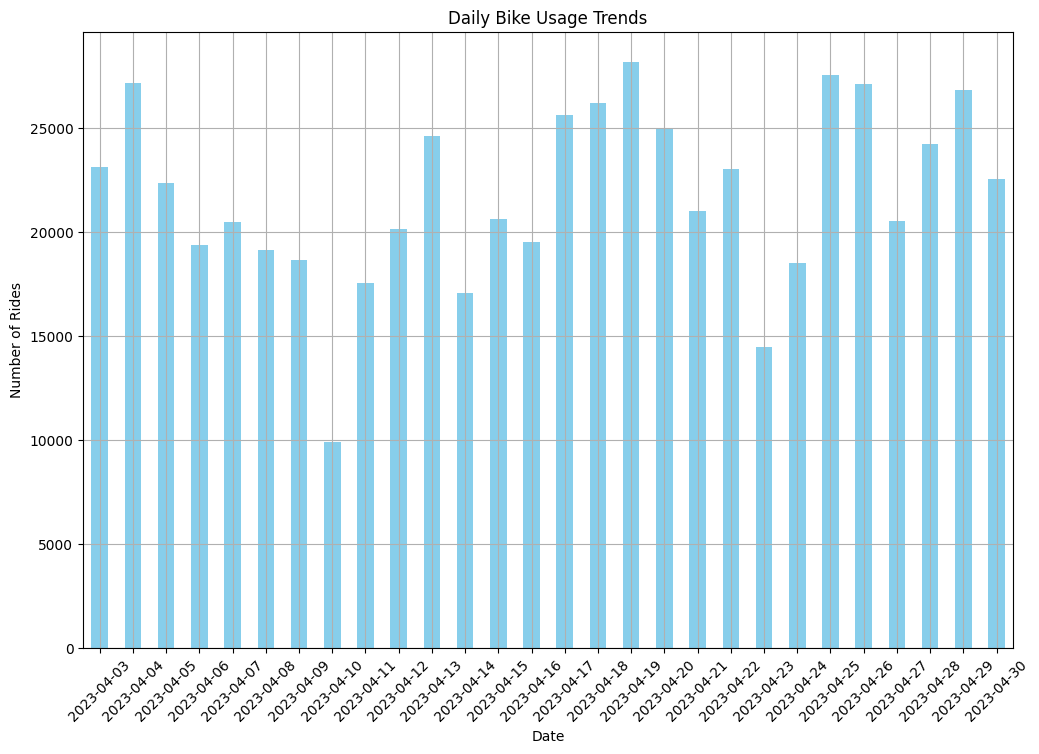

In [98]:
# Plot the daily bike usage
plt.figure(figsize=(12, 8))
daily_counts.plot(kind='bar', color='skyblue')
plt.title('Daily Bike Usage Trends')
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Total Duration of Bike Usage Per Day**

In [99]:
# Convert 'Total duration (ms)' to hours for easier interpretation
data1['Total duration (hrs)'] = data1['Total duration (ms)'] / (1000 * 60 * 60)
# Group the data by the date extracting only the date part from 'Start date' and sum the total duration
daily_duration = data1.groupby(data1['Start date'].dt.date)['Total duration (hrs)'].sum()



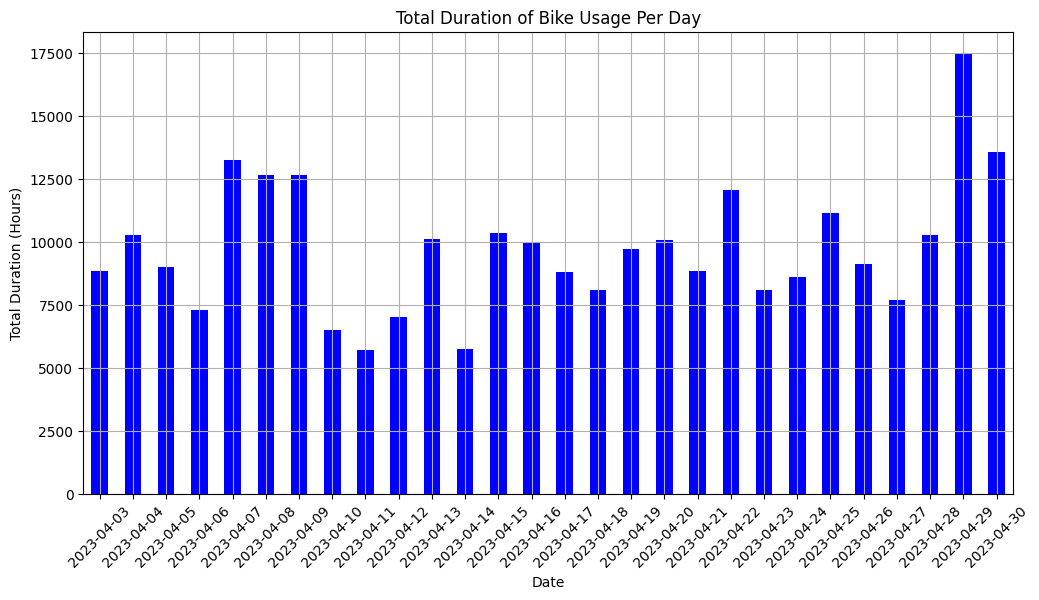

In [100]:
# Plot the total duration per day
plt.figure(figsize=(12, 6))
daily_duration.plot(kind='bar', color='blue')
plt.title('Total Duration of Bike Usage Per Day')
plt.xlabel('Date')
plt.ylabel('Total Duration (Hours)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [101]:
data1.head()

,Number,Start date,Start station number,Start station,End date,End station number,End station,Bike number,Bike model,Total duration,Total duration (ms),Total duration (hrs)
0,129755564,2023-04-09 23:59:00,1054,"East Road, Hoxton",2023-04-10 00:12,300031,"Islington Green, Angel",58906,CLASSIC,13m 18s,798660,0.221850
1,129755565,2023-04-09 23:59:00,200039,"Sail Street, Vauxhall",2023-04-10 00:13,200039,"Sail Street, Vauxhall",59510,CLASSIC,13m 52s,832949,0.231375
2,129755566,2023-04-09 23:59:00,1071,"Tower Gardens , Tower",2023-04-10 00:18,2690,"City Road, Angel",54082,CLASSIC,19m 11s,1151358,0.319822
3,129755556,2023-04-09 23:58:00,300092,"Hertford Road, De Beauvoir Town",2023-04-10 00:08,1131,"Graham Street, Angel",23273,CLASSIC,10m 48s,648713,0.180198
4,129755557,2023-04-09 23:58:00,2691,"Howland Street, Fitzrovia",2023-04-10 00:00,3497,"Rathbone Street, Fitzrovia",54927,CLASSIC,2m 22s,142395,0.039554


In [102]:
data1.drop(['Number','Bike number'],axis=1,inplace=True)

In [103]:
import pandas as pd

# Assuming your DataFrame is named data1
data1['Start date'] = pd.to_datetime(data1['Start date'])
data1['End date'] = pd.to_datetime(data1['End date'])

# Convert datetime to numeric form (timestamp in seconds)
data1['Start date'] = data1['Start date'].apply(lambda x: x.timestamp())
data1['End date'] = data1['End date'].apply(lambda x: x.timestamp())

# Display the first few rows to check the conversion
print(data1.head())


     Start date  Start station number                    Start station  \
0  1.681085e+09                  1054                East Road, Hoxton   
1  1.681085e+09                200039            Sail Street, Vauxhall   
2  1.681085e+09                  1071            Tower Gardens , Tower   
3  1.681085e+09                300092  Hertford Road, De Beauvoir Town   
4  1.681085e+09                  2691        Howland Street, Fitzrovia   

       End date  End station number                 End station Bike model  \
0  1.681086e+09              300031      Islington Green, Angel    CLASSIC   
1  1.681086e+09              200039       Sail Street, Vauxhall    CLASSIC   
2  1.681086e+09                2690            City Road, Angel    CLASSIC   
3  1.681085e+09                1131        Graham Street, Angel    CLASSIC   
4  1.681085e+09                3497  Rathbone Street, Fitzrovia    CLASSIC   

  Total duration  Total duration (ms)  Total duration (hrs)  
0        13m 18s        

In [104]:
data1.dtypes

Start date              float64
Start station number      int64
Start station            object
End date                float64
End station number        int64
End station              object
Bike model               object
Total duration           object
Total duration (ms)       int64
Total duration (hrs)    float64
dtype: object

In [105]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
label_encoder = LabelEncoder()

# Encode each of the object type columns
data1['Start station'] = label_encoder.fit_transform(data1['Start station'])
data1['End station'] = label_encoder.fit_transform(data1['End station'])
data1['Bike model'] = label_encoder.fit_transform(data1['Bike model'])


In [106]:
data1.drop(['Total duration','Total duration (hrs)'],axis=1,inplace=True)

In [107]:
data1.head()

,Start date,Start station number,Start station,End date,End station number,End station,Bike model,Total duration (ms)
0,1.681085e+09,1054,217,1.681086e+09,300031,377,0,798660
1,1.681085e+09,200039,600,1.681086e+09,200039,602,0,832949
2,1.681085e+09,1071,714,1.681086e+09,2690,149,0,1151358
3,1.681085e+09,300092,347,1.681085e+09,1131,298,0,648713
4,1.681085e+09,2691,363,1.681085e+09,3497,576,0,142395


In [108]:
data2=pd.read_csv('/kaggle/input/bike-usage-prediction/london 2023-02-01 to 2023-04-30.csv')
data2.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,london,2023-02-01,10.6,4.9,7.5,10.6,1.2,4.7,3.1,73.8,...,4.1,3,NaN,2023-02-01T07:39:21,2023-02-01T16:49:29,0.36,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"03680099999,D5621,03672099999,03781099999,remo..."
1,london,2023-02-02,10.7,6.3,8.8,10.7,3.1,6.7,5.5,80.2,...,3.2,3,NaN,2023-02-02T07:37:48,2023-02-02T16:51:18,0.39,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"03680099999,D5621,03672099999,03781099999,remo..."
2,london,2023-02-03,12.2,6.8,9.8,12.2,5.5,8.2,6.8,81.9,...,3.5,2,NaN,2023-02-03T07:36:14,2023-02-03T16:53:07,0.42,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"03769099999,03680099999,D5621,03672099999,0378..."
3,london,2023-02-04,8.9,6.5,8.1,7.0,5.3,6.1,5.5,84.1,...,1.5,1,NaN,2023-02-04T07:34:37,2023-02-04T16:54:57,0.46,Overcast,Cloudy skies throughout the day.,cloudy,"03769099999,03680099999,D5621,03672099999,0378..."
4,london,2023-02-05,8.0,0.3,5.0,5.8,-0.8,3.0,1.3,77.6,...,4.5,3,NaN,2023-02-05T07:32:58,2023-02-05T16:56:46,0.50,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"03680099999,D5621,03672099999,03781099999,remo..."


In [109]:
data2['datetime'] = pd.to_datetime(data2['datetime'])
data2['sunrise'] = pd.to_datetime(data2['sunset'])
data2['sunset'] = pd.to_datetime(data2['sunset'])

# Convert datetime to numeric form (timestamp in seconds)
data2['datetime'] = data2['datetime'].apply(lambda x: x.timestamp())
data2['sunrise'] = data2['sunrise'].apply(lambda x: x.timestamp())
data2['sunset'] = data2['sunset'].apply(lambda x: x.timestamp())

# Display the first few rows to check the conversion
print(data2.head())

     name      datetime  tempmax  tempmin  temp  feelslikemax  feelslikemin  \
0  london  1.675210e+09     10.6      4.9   7.5          10.6           1.2   
1  london  1.675296e+09     10.7      6.3   8.8          10.7           3.1   
2  london  1.675382e+09     12.2      6.8   9.8          12.2           5.5   
3  london  1.675469e+09      8.9      6.5   8.1           7.0           5.3   
4  london  1.675555e+09      8.0      0.3   5.0           5.8          -0.8   

   feelslike  dew  humidity  ...  solarenergy  uvindex  severerisk  \
0        4.7  3.1      73.8  ...          4.1        3         NaN   
1        6.7  5.5      80.2  ...          3.2        3         NaN   
2        8.2  6.8      81.9  ...          3.5        2         NaN   
3        6.1  5.5      84.1  ...          1.5        1         NaN   
4        3.0  1.3      77.6  ...          4.5        3         NaN   

        sunrise        sunset  moonphase        conditions  \
0  1.675270e+09  1.675270e+09       0.36  

In [110]:
data2.shape

(89, 33)

In [111]:
data2.isnull().sum()

name                 0
datetime             0
tempmax              0
tempmin              0
temp                 0
feelslikemax         0
feelslikemin         0
feelslike            0
dew                  0
humidity             0
precip               0
precipprob           0
precipcover          0
preciptype          36
snow                 0
snowdepth            0
windgust             0
windspeed            0
winddir              0
sealevelpressure     0
cloudcover           0
visibility           0
solarradiation       0
solarenergy          0
uvindex              0
severerisk          89
sunrise              0
sunset               0
moonphase            0
conditions           0
description          0
icon                 0
stations             0
dtype: int64

In [112]:
data2.drop(['name','preciptype','severerisk'],axis=1,inplace=True)

In [113]:
data2['conditions'] = label_encoder.fit_transform(data2['conditions'])
data2['description'] = label_encoder.fit_transform(data2['description'])
data2['icon'] = label_encoder.fit_transform(data2['icon'])
data2['stations'] = label_encoder.fit_transform(data2['stations'])


In [114]:
data2.head()

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase,conditions,description,icon,stations
0,1.675210e+09,10.6,4.9,7.5,10.6,1.2,4.7,3.1,73.8,0.0,...,48.0,4.1,3,1.675270e+09,1.675270e+09,0.36,2,22,2,5
1,1.675296e+09,10.7,6.3,8.8,10.7,3.1,6.7,5.5,80.2,0.0,...,37.0,3.2,3,1.675357e+09,1.675357e+09,0.39,2,22,2,4
2,1.675382e+09,12.2,6.8,9.8,12.2,5.5,8.2,6.8,81.9,0.0,...,39.6,3.5,2,1.675443e+09,1.675443e+09,0.42,2,22,2,6
3,1.675469e+09,8.9,6.5,8.1,7.0,5.3,6.1,5.5,84.1,0.0,...,15.8,1.5,1,1.675530e+09,1.675530e+09,0.46,1,13,1,11
4,1.675555e+09,8.0,0.3,5.0,5.8,-0.8,3.0,1.3,77.6,0.0,...,51.0,4.5,3,1.675616e+09,1.675616e+09,0.50,2,22,2,4


In [115]:
data2.dtypes

datetime            float64
tempmax             float64
tempmin             float64
temp                float64
feelslikemax        float64
feelslikemin        float64
feelslike           float64
dew                 float64
humidity            float64
precip              float64
precipprob            int64
precipcover         float64
snow                  int64
snowdepth             int64
windgust            float64
windspeed           float64
winddir             float64
sealevelpressure    float64
cloudcover          float64
visibility          float64
solarradiation      float64
solarenergy         float64
uvindex               int64
sunrise             float64
sunset              float64
moonphase           float64
conditions            int64
description           int64
icon                  int64
stations              int64
dtype: object

In [116]:
data2.isnull().sum()

datetime            0
tempmax             0
tempmin             0
temp                0
feelslikemax        0
feelslikemin        0
feelslike           0
dew                 0
humidity            0
precip              0
precipprob          0
precipcover         0
snow                0
snowdepth           0
windgust            0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
visibility          0
solarradiation      0
solarenergy         0
uvindex             0
sunrise             0
sunset              0
moonphase           0
conditions          0
description         0
icon                0
stations            0
dtype: int64

In [117]:
data2.dtypes

datetime            float64
tempmax             float64
tempmin             float64
temp                float64
feelslikemax        float64
feelslikemin        float64
feelslike           float64
dew                 float64
humidity            float64
precip              float64
precipprob            int64
precipcover         float64
snow                  int64
snowdepth             int64
windgust            float64
windspeed           float64
winddir             float64
sealevelpressure    float64
cloudcover          float64
visibility          float64
solarradiation      float64
solarenergy         float64
uvindex               int64
sunrise             float64
sunset              float64
moonphase           float64
conditions            int64
description           int64
icon                  int64
stations              int64
dtype: object

**Merging Journey data with Weather data**

In [118]:
journey_data = data1.copy()
weather_data = data2.copy()
# Convert the date fields
journey_data['Start date'] = pd.to_datetime(journey_data['Start date'],unit='s')
weather_data['datetime'] = pd.to_datetime(weather_data['datetime'],unit='s').dt.date


In [119]:
weather_data.head()

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase,conditions,description,icon,stations
0,2023-02-01,10.6,4.9,7.5,10.6,1.2,4.7,3.1,73.8,0.0,...,48.0,4.1,3,1.675270e+09,1.675270e+09,0.36,2,22,2,5
1,2023-02-02,10.7,6.3,8.8,10.7,3.1,6.7,5.5,80.2,0.0,...,37.0,3.2,3,1.675357e+09,1.675357e+09,0.39,2,22,2,4
2,2023-02-03,12.2,6.8,9.8,12.2,5.5,8.2,6.8,81.9,0.0,...,39.6,3.5,2,1.675443e+09,1.675443e+09,0.42,2,22,2,6
3,2023-02-04,8.9,6.5,8.1,7.0,5.3,6.1,5.5,84.1,0.0,...,15.8,1.5,1,1.675530e+09,1.675530e+09,0.46,1,13,1,11
4,2023-02-05,8.0,0.3,5.0,5.8,-0.8,3.0,1.3,77.6,0.0,...,51.0,4.5,3,1.675616e+09,1.675616e+09,0.50,2,22,2,4


In [120]:
# Extract just the date part for joining
journey_data['date_only'] = journey_data['Start date'].dt.date
# Merge the datasets on the date part
combined_data = pd.merge(journey_data, weather_data, left_on='date_only', right_on='datetime', how='inner')

In [121]:
# Update: Exclude 'snow' and 'snowdepth' columns from the analysis
combined_data.drop(columns=['snow', 'snowdepth'], inplace=True)

In [122]:
combined_data.shape

(611059, 37)

In [123]:
combined_data.head()

,Start date,Start station number,Start station,End date,End station number,End station,Bike model,Total duration (ms),date_only,datetime,...,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase,conditions,description,icon,stations
0,2023-04-09 23:59:00,1054,217,1.681086e+09,300031,377,0,798660,2023-04-09,2023-04-09,...,175.5,15.1,7,1.681070e+09,1.681070e+09,0.62,2,7,2,3
1,2023-04-09 23:59:00,200039,600,1.681086e+09,200039,602,0,832949,2023-04-09,2023-04-09,...,175.5,15.1,7,1.681070e+09,1.681070e+09,0.62,2,7,2,3
2,2023-04-09 23:59:00,1071,714,1.681086e+09,2690,149,0,1151358,2023-04-09,2023-04-09,...,175.5,15.1,7,1.681070e+09,1.681070e+09,0.62,2,7,2,3
3,2023-04-09 23:58:00,300092,347,1.681085e+09,1131,298,0,648713,2023-04-09,2023-04-09,...,175.5,15.1,7,1.681070e+09,1.681070e+09,0.62,2,7,2,3
4,2023-04-09 23:58:00,2691,363,1.681085e+09,3497,576,0,142395,2023-04-09,2023-04-09,...,175.5,15.1,7,1.681070e+09,1.681070e+09,0.62,2,7,2,3


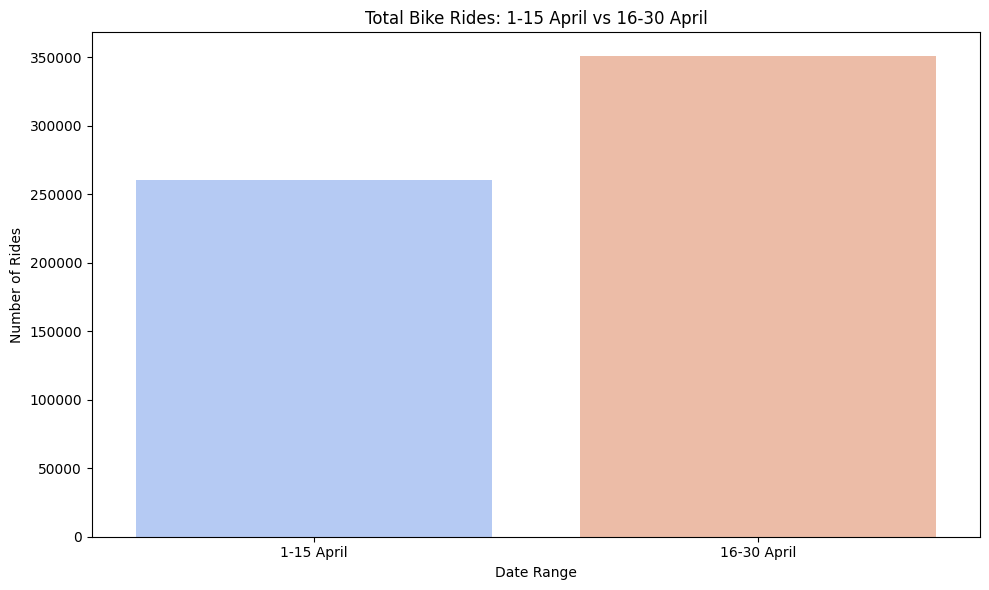

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming combined_data is already loaded and the 'Start date' column is in datetime format
data = combined_data.copy()

# Extract the day of the month from the start date
data['day_of_month'] = data['Start date'].dt.day

# Define the date ranges
first_half = data[(data['Start date'].dt.month == 4) & (data['day_of_month'] <= 15)]
second_half = data[(data['Start date'].dt.month == 4) & (data['day_of_month'] > 15)]

# Count the number of rides in each range
rides_count = pd.DataFrame({
    'Date Range': ['1-15 April', '16-30 April'],
    'Number of Rides': [first_half.shape[0], second_half.shape[0]]
})

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Date Range', y='Number of Rides', data=rides_count, palette='coolwarm')
plt.title('Total Bike Rides: 1-15 April vs 16-30 April')
plt.xlabel('Date Range')
plt.ylabel('Number of Rides')
plt.tight_layout()
plt.show()


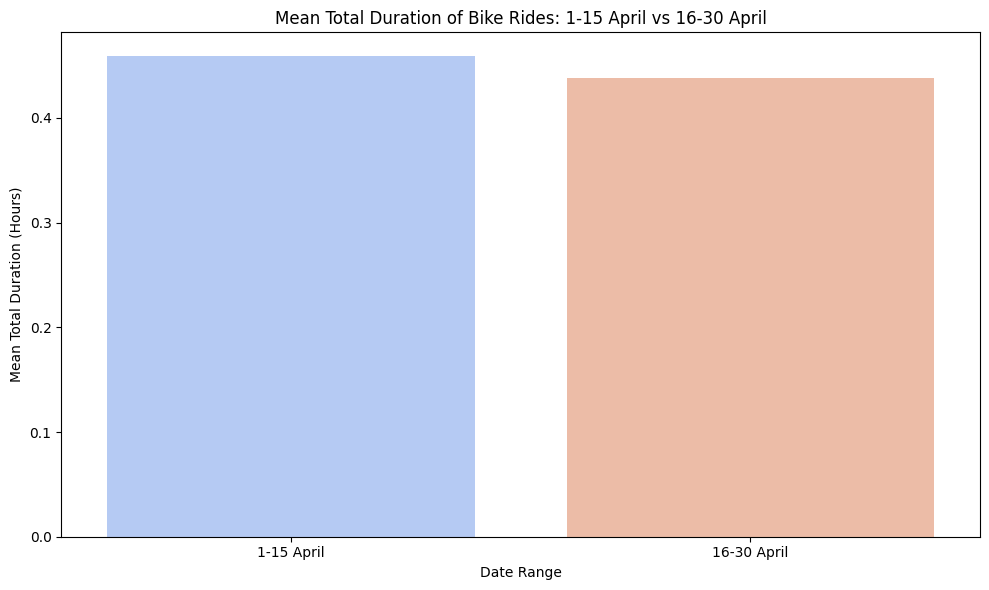

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming combined_data is already loaded and the 'Start date' column is in datetime format
data = combined_data.copy()

# Convert milliseconds to hours for more interpretable duration
data['Total duration (hrs)'] = data['Total duration (ms)'] / (3600 * 1000)

# Extract the day of the month from the start date
data['day_of_month'] = data['Start date'].dt.day

# Define the date ranges
first_half = data[(data['Start date'].dt.month == 4) & (data['day_of_month'] <= 15)]
second_half = data[(data['Start date'].dt.month == 4) & (data['day_of_month'] > 15)]

# Calculate the mean total duration for each range
mean_duration = pd.DataFrame({
    'Date Range': ['1-15 April', '16-30 April'],
    'Mean Total Duration (hrs)': [first_half['Total duration (hrs)'].mean(), second_half['Total duration (hrs)'].mean()]
})

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Date Range', y='Mean Total Duration (hrs)', data=mean_duration, palette='coolwarm')
plt.title('Mean Total Duration of Bike Rides: 1-15 April vs 16-30 April')
plt.xlabel('Date Range')
plt.ylabel('Mean Total Duration (Hours)')
plt.tight_layout()
plt.show()


In [37]:
combined_data.dtypes

Start date              datetime64[ns]
Start station number             int64
Start station                    int64
End date                       float64
End station number               int64
End station                      int64
Bike model                       int64
Total duration (ms)              int64
date_only                       object
datetime                        object
tempmax                        float64
tempmin                        float64
temp                           float64
feelslikemax                   float64
feelslikemin                   float64
feelslike                      float64
dew                            float64
humidity                       float64
precip                         float64
precipprob                       int64
precipcover                    float64
windgust                       float64
windspeed                      float64
winddir                        float64
sealevelpressure               float64
cloudcover               

In [38]:
combined_data['Start date'] = pd.to_datetime(combined_data['Start date'])
combined_data['datetime'] = pd.to_datetime(combined_data['datetime'])
combined_data['Start date'] = combined_data['Start date'].apply(lambda x: x.timestamp())
combined_data['datetime'] = combined_data['datetime'].apply(lambda x: x.timestamp())

In [39]:
combined_data.drop('date_only',axis=1,inplace=True)

In [40]:
combined_data.dtypes

Start date              float64
Start station number      int64
Start station             int64
End date                float64
End station number        int64
End station               int64
Bike model                int64
Total duration (ms)       int64
datetime                float64
tempmax                 float64
tempmin                 float64
temp                    float64
feelslikemax            float64
feelslikemin            float64
feelslike               float64
dew                     float64
humidity                float64
precip                  float64
precipprob                int64
precipcover             float64
windgust                float64
windspeed               float64
winddir                 float64
sealevelpressure        float64
cloudcover              float64
visibility              float64
solarradiation          float64
solarenergy             float64
uvindex                   int64
sunrise                 float64
sunset                  float64
moonphas

Average Total Duration by Day of the Week

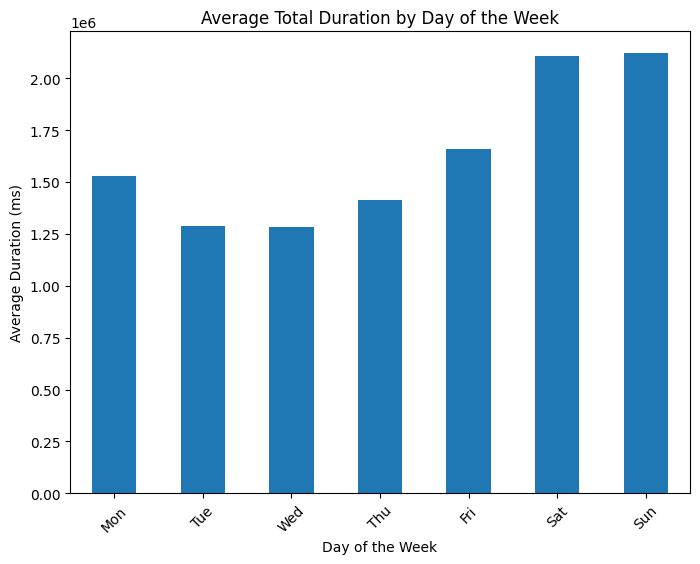

In [41]:
combined_data['Start date'] = pd.to_datetime(combined_data['Start date'], unit='s')
combined_data['day_of_week'] = combined_data['Start date'].dt.dayofweek
combined_data['is_weekend'] = (combined_data['day_of_week'] > 4).astype(int)

# Analysis based on day of the week or weekend
# Calculate some statistics or perform correlation with other non-time-specific factors
# For example, average duration per day of the week
weekly_duration = combined_data.groupby('day_of_week')['Total duration (ms)'].mean()

# Plotting
plt.figure(figsize=(8, 6))
weekly_duration.plot(kind='bar')
plt.title('Average Total Duration by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Duration (ms)')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45)
plt.show()


In [42]:
combined_data.head()

,Start date,Start station number,Start station,End date,End station number,End station,Bike model,Total duration (ms),datetime,tempmax,...,uvindex,sunrise,sunset,moonphase,conditions,description,icon,stations,day_of_week,is_weekend
0,2023-04-09 23:59:00,1054,217,1.681086e+09,300031,377,0,798660,1.680998e+09,16.8,...,7,1.681070e+09,1.681070e+09,0.62,2,7,2,3,6,1
1,2023-04-09 23:59:00,200039,600,1.681086e+09,200039,602,0,832949,1.680998e+09,16.8,...,7,1.681070e+09,1.681070e+09,0.62,2,7,2,3,6,1
2,2023-04-09 23:59:00,1071,714,1.681086e+09,2690,149,0,1151358,1.680998e+09,16.8,...,7,1.681070e+09,1.681070e+09,0.62,2,7,2,3,6,1
3,2023-04-09 23:58:00,300092,347,1.681085e+09,1131,298,0,648713,1.680998e+09,16.8,...,7,1.681070e+09,1.681070e+09,0.62,2,7,2,3,6,1
4,2023-04-09 23:58:00,2691,363,1.681085e+09,3497,576,0,142395,1.680998e+09,16.8,...,7,1.681070e+09,1.681070e+09,0.62,2,7,2,3,6,1


In [43]:
combined_data.dtypes

Start date              datetime64[ns]
Start station number             int64
Start station                    int64
End date                       float64
End station number               int64
End station                      int64
Bike model                       int64
Total duration (ms)              int64
datetime                       float64
tempmax                        float64
tempmin                        float64
temp                           float64
feelslikemax                   float64
feelslikemin                   float64
feelslike                      float64
dew                            float64
humidity                       float64
precip                         float64
precipprob                       int64
precipcover                    float64
windgust                       float64
windspeed                      float64
winddir                        float64
sealevelpressure               float64
cloudcover                     float64
visibility               

In [44]:
combined_data['Total duration (ms)'][combined_data['precip']>0].mean()

1482272.8453991388

In [45]:
combined_data['Total duration (ms)'][combined_data['precip']==0].mean()

1756192.7076183965

/tmp/ipykernel_35/2939969782.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_duration_per_bin = data.groupby('Temp_Bins')['Total duration (hrs)'].mean().reset_index()
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


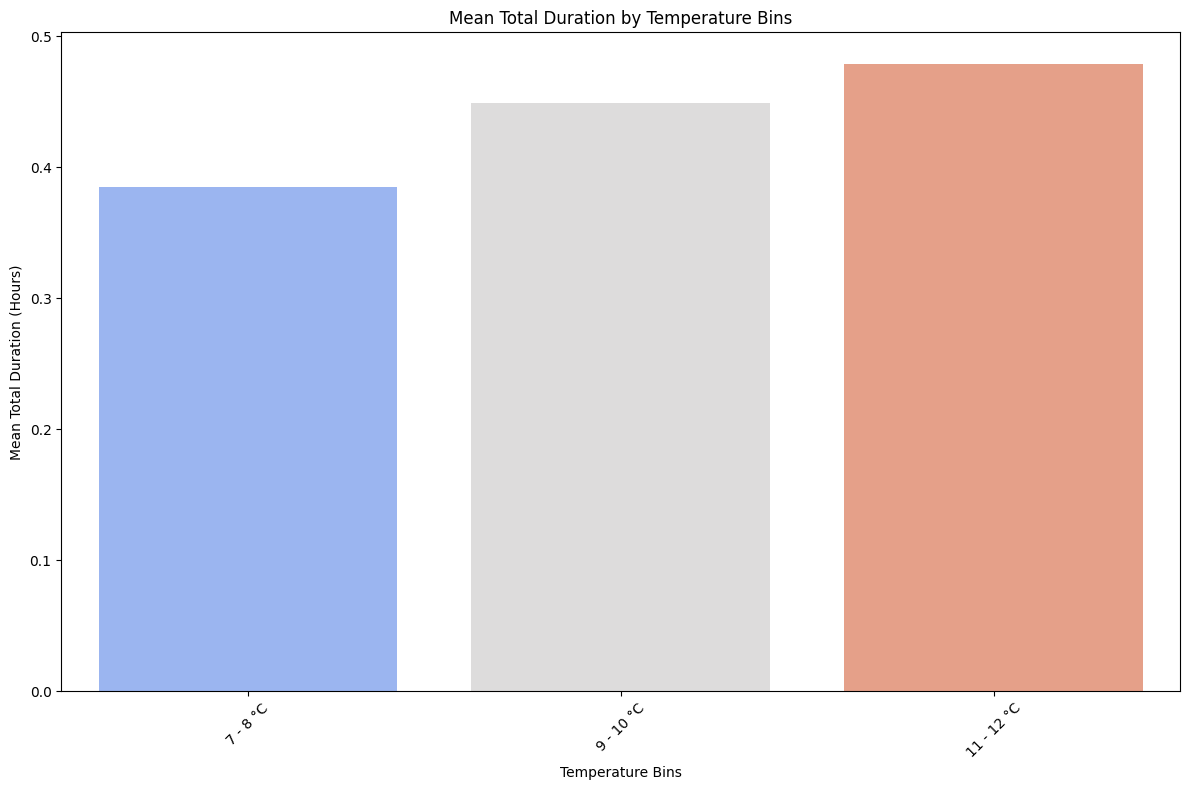

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = combined_data.copy()

# Convert milliseconds to hours for more interpretable duration
data['Total duration (hrs)'] = data['Total duration (ms)'] / (3600 * 1000)

# Define temperature bins
temp_min = int(data['temp'].min())
temp_max = int(data['temp'].max())
bin_edges = range(temp_min, temp_max + 2, 2)  # Bin every 2 degrees

# Ensure the labels match the number of bins
bin_labels = [f'{i} - {i + 1} °C' for i in bin_edges[:-1]]

# Categorize temperatures into bins
data['Temp_Bins'] = pd.cut(data['temp'], bins=bin_edges, labels=bin_labels, right=False)

# Group by the temperature bins and calculate the mean duration
mean_duration_per_bin = data.groupby('Temp_Bins')['Total duration (hrs)'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Temp_Bins', y='Total duration (hrs)', data=mean_duration_per_bin, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Mean Total Duration by Temperature')
plt.xlabel('Temperature Bins')
plt.ylabel('Mean Total Duration (Hours)')
plt.tight_layout()  
plt.show()


/tmp/ipykernel_34/3286056497.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rides_per_bin = data.groupby('Temp_Bins').size().reset_index(name='Number of Rides')
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


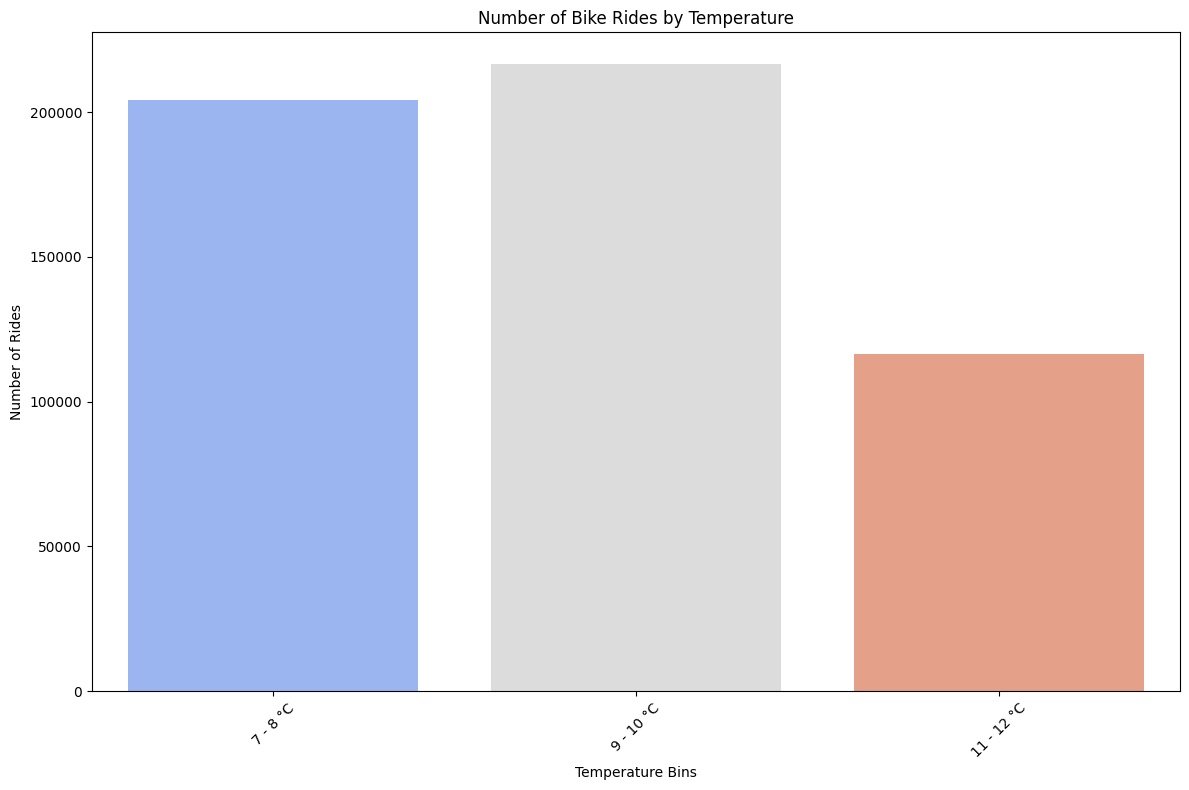

In [47]:
import seaborn as sns
data = combined_data.copy()

# Convert milliseconds to hours for more interpretable duration (if needed)
data['Total duration (hrs)'] = data['Total duration (ms)'] / (3600 * 1000)

# Define temperature bins
temp_min = int(data['temp'].min())
temp_max = int(data['temp'].max())
bin_edges = range(temp_min, temp_max + 2, 2)  # Bin every 2 degrees

# Ensure the labels match the number of bins
bin_labels = [f'{i} - {i + 1} °C' for i in bin_edges[:-1]]

# Categorize temperatures into bins
data['Temp_Bins'] = pd.cut(data['temp'], bins=bin_edges, labels=bin_labels, right=False)

# Group by the temperature bins and count the number of rides
rides_per_bin = data.groupby('Temp_Bins').size().reset_index(name='Number of Rides')

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Temp_Bins', y='Number of Rides', data=rides_per_bin, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Number of Bike Rides by Temperature')
plt.xlabel('Temperature Bins')
plt.ylabel('Number of Rides')
plt.tight_layout()
plt.show()

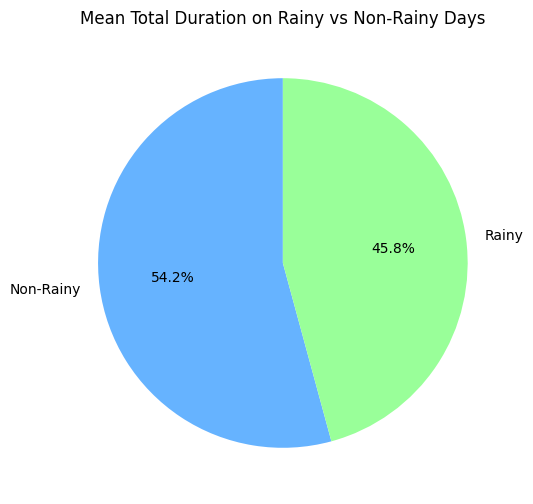

In [110]:
import pandas as pd
import matplotlib.pyplot as plt


df = combined_data.copy()

# Convert milliseconds to hours for a better scale
df['Total duration (hrs)'] = df['Total duration (ms)'] / (1000 * 60 * 60)

# Define rainy and non-rainy days based on precipitation
df['Rain_Status'] = df['precip'].apply(lambda x: 'Rainy' if x > 0 else 'Non-Rainy')

# Calculate mean total duration by rain status
mean_durations = df.groupby('Rain_Status')['Total duration (hrs)'].mean()

# Plotting
mean_durations.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'], figsize=(8, 6))
plt.ylabel('')  # Hide the y-label as it's not informative for pie charts
plt.title('Mean Total Duration on Rainy vs Non-Rainy Days')
plt.show()


**Feature Engineering**

In [43]:
combined_data.shape

(611059, 38)

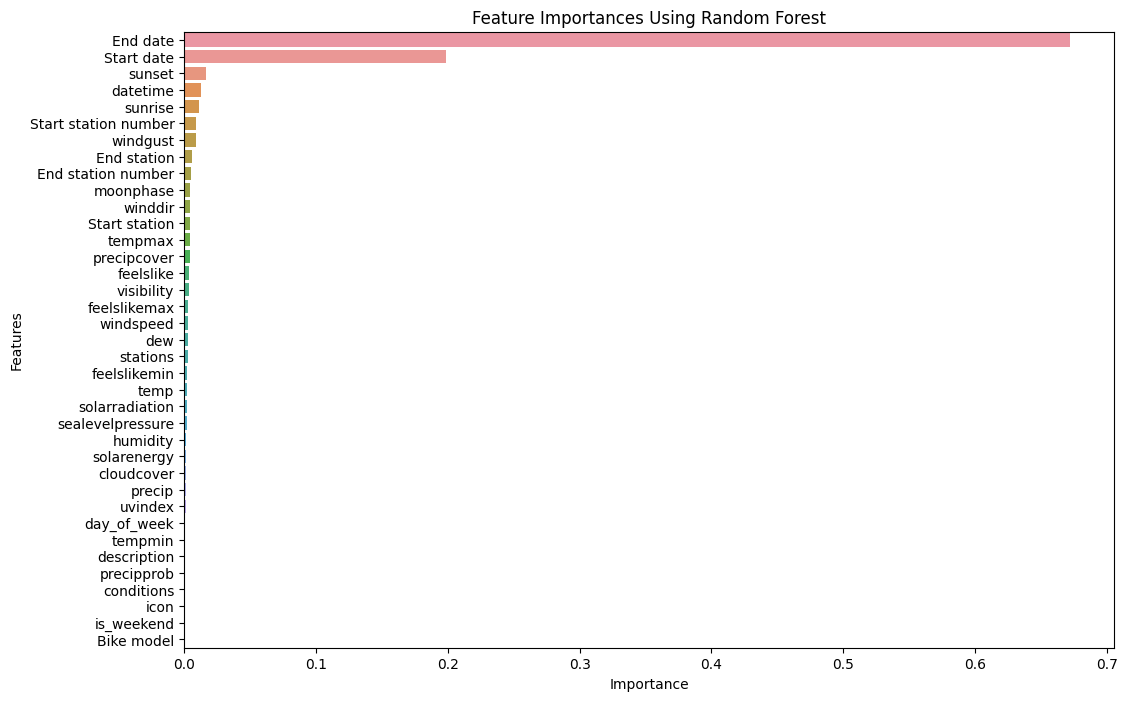

In [68]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

df=combined_data.copy()
df['Start date'] = df['Start date'].apply(lambda x: x.timestamp())
X = df.drop('Total duration (ms)', axis=1)  # Features
y = df['Total duration (ms)']  # Target variable



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Get feature importances from the model
importances = random_forest.feature_importances_
feature_names = X.columns  

# Create a DataFrame to hold feature names and their importance scores
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importances_df)
plt.title('Feature Importances Using Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


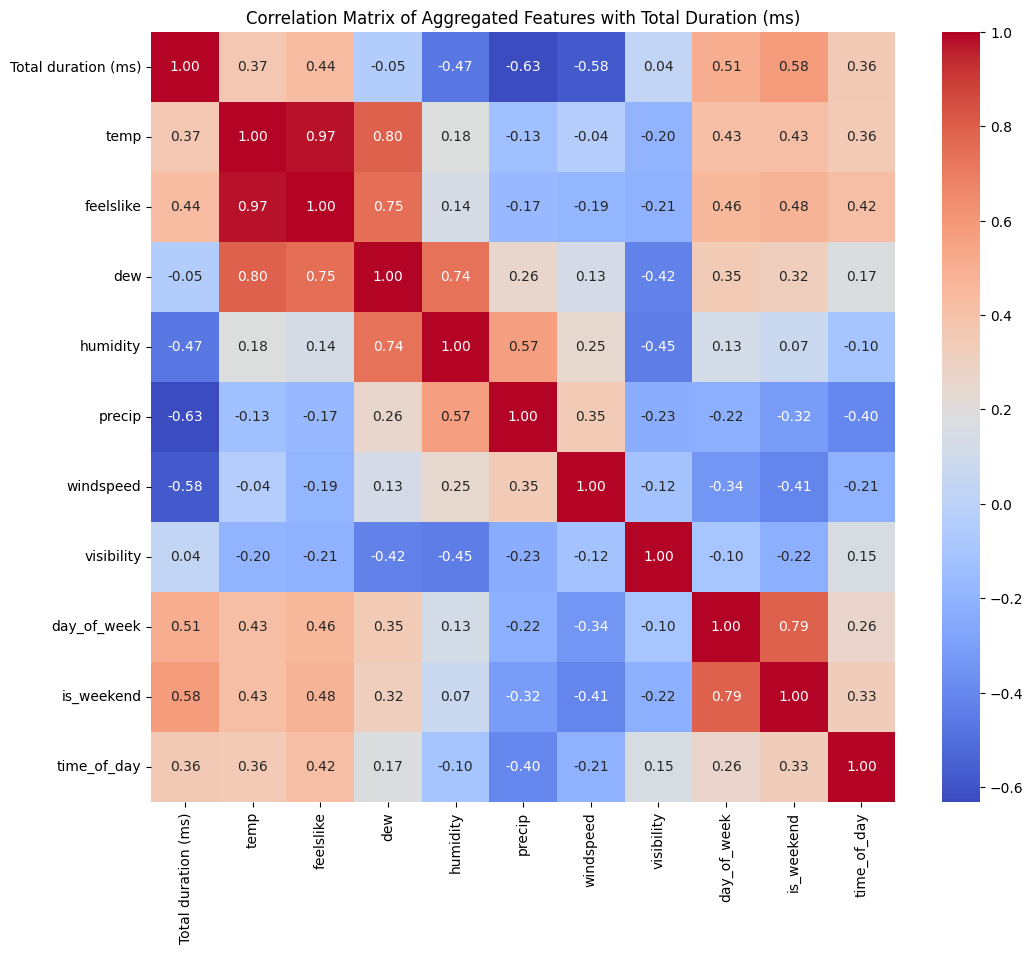

Correlation of features with 'Total duration (ms)':
Total duration (ms)    1.000000
temp                   0.371462
feelslike              0.438655
dew                   -0.048784
humidity              -0.466878
precip                -0.631252
windspeed             -0.578905
visibility             0.035631
day_of_week            0.506480
is_weekend             0.582672
time_of_day            0.361408
Name: Total duration (ms), dtype: float64


In [44]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


data = combined_data.copy()

data['Start date'] = pd.to_datetime(data['Start date'])

# Calculate 'time of day' as numeric for correlation calculation (though typically we'd exclude this)
data['time_of_day'] = data['Start date'].dt.hour  # Using hour directly for a simple numeric conversion

# Group by 'date_only' if it is needed or use an appropriate identifier for aggregation
data['date_only'] = data['Start date'].dt.date

# Aggregate necessary features including the existing 'day_of_week' and 'holiday'
aggregated_data = data.groupby('date_only').agg({
    'Total duration (ms)': 'sum',  
    'temp': 'mean',
    'feelslike': 'mean',
    'dew': 'mean',
    'humidity': 'mean',
    'precip': 'sum',
    'windspeed': 'mean',
    'visibility': 'mean',
    'day_of_week': 'first',  # Numeric as it's a day number
    'is_weekend': 'max',  # Numeric as it's likely binary (0 or 1)
    'time_of_day': 'mean'  # Mean hour might not be very meaningful, consider excluding or modifying
})

# Remove non-numeric columns manually if any remain
numeric_data = aggregated_data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Aggregated Features with Total Duration (ms)')
plt.show()

# Print the correlation values with 'Total duration (ms)'
print("Correlation of features with 'Total duration (ms)':")
print(correlation_matrix['Total duration (ms)'])


In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


data = combined_data.copy()

# Ensure 'Start date' is a datetime object
data['Start date'] = pd.to_datetime(data['Start date'])

# Generate 'time_of_day' from 'Start date'
data['time_of_day'] = data['Start date'].dt.hour.apply(
    lambda x: 'Morning' if 5 <= x < 12 else
              'Afternoon' if 12 <= x < 17 else
              'Evening' if 17 <= x < 21 else
              'Night'
)

# Specify features to be included in the model
features = [
    'temp', 'feelslike', 'dew', 'humidity', 
    'precip', 'windspeed', 'visibility', 
    'day_of_week', 'is_weekend', 'time_of_day'
]

# Convert categorical 'time_of_day' to dummy variables
time_of_day_dummies = pd.get_dummies(data['time_of_day'], prefix='time_of_day')
data = pd.concat([data, time_of_day_dummies], axis=1)

# Updated feature list including dummy variables for 'time_of_day'
features_updated = features[:-1] + list(time_of_day_dummies.columns)  # Remove 'time_of_day' and add dummy columns

# Selecting the data for model
model_data = data[features_updated + ['Total duration (ms)']]

# Handling any missing values
#model_data.dropna(inplace=True)

# Split the data into features (X) and target (y)
X = model_data[features_updated]
y = model_data['Total duration (ms)']

In [46]:
X.dtypes

temp                     float64
feelslike                float64
dew                      float64
humidity                 float64
precip                   float64
windspeed                float64
visibility               float64
day_of_week                int32
is_weekend                 int64
time_of_day_Afternoon       bool
time_of_day_Evening         bool
time_of_day_Morning         bool
time_of_day_Night           bool
dtype: object

In [47]:
X.head()

,temp,feelslike,dew,humidity,precip,windspeed,visibility,day_of_week,is_weekend,time_of_day_Afternoon,time_of_day_Evening,time_of_day_Morning,time_of_day_Night
0,11.3,10.8,5.0,67.9,0.0,17.2,16.5,6,1,False,False,False,True
1,11.3,10.8,5.0,67.9,0.0,17.2,16.5,6,1,False,False,False,True
2,11.3,10.8,5.0,67.9,0.0,17.2,16.5,6,1,False,False,False,True
3,11.3,10.8,5.0,67.9,0.0,17.2,16.5,6,1,False,False,False,True
4,11.3,10.8,5.0,67.9,0.0,17.2,16.5,6,1,False,False,False,True


In [48]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Reshape y for scaling
y = y.values.reshape(-1, 1)

# Scale X and y
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

In [49]:
y_log = np.log1p(y)  # log1p is used to handle zero values smoothly

# Apply Min-Max Scaling
scaler = MinMaxScaler()
y_log_scaled = scaler.fit_transform(y_log.reshape(-1, 1))  # Reshape if y is a series

# Convert the array back to a DataFrame for consistency
y_log_scaled_df = pd.DataFrame(y_log_scaled, columns=['Total duration (ms) scaled'])

# Display the first few rows to check the new scaling
print(y_log_scaled_df.head())

   Total duration (ms) scaled
0                    0.430914
1                    0.433677
2                    0.454957
3                    0.417245
4                    0.317567


In [50]:
X_scaled.shape

(611059, 13)

In [51]:
x_scaled_df = pd.DataFrame(X_scaled, columns=['temp', 'feelslike', 'dew', 'humidity', 
    'precip', 'windspeed', 'visibility', 
    'day_of_week', 'is_weekend', 'time_of_day_Afternoon','time_of_day_Evening',
    'time_of_day_Morning','time_of_day_Night'])

# Display the first few rows of the DataFrame to verify
print(x_scaled_df.head())

   temp  feelslike       dew  humidity  precip  windspeed  visibility  \
0   0.6   0.621951  0.490566  0.384615     0.0   0.198142    0.166667   
1   0.6   0.621951  0.490566  0.384615     0.0   0.198142    0.166667   
2   0.6   0.621951  0.490566  0.384615     0.0   0.198142    0.166667   
3   0.6   0.621951  0.490566  0.384615     0.0   0.198142    0.166667   
4   0.6   0.621951  0.490566  0.384615     0.0   0.198142    0.166667   

   day_of_week  is_weekend  time_of_day_Afternoon  time_of_day_Evening  \
0          1.0         1.0                    0.0                  0.0   
1          1.0         1.0                    0.0                  0.0   
2          1.0         1.0                    0.0                  0.0   
3          1.0         1.0                    0.0                  0.0   
4          1.0         1.0                    0.0                  0.0   

   time_of_day_Morning  time_of_day_Night  
0                  0.0                1.0  
1                  0.0      

**Linear Regression**

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Make sure that X and y_scaled_df are aligned
# It's a good practice to align indices when concatenating or working with multiple DataFrames
X.reset_index(drop=True, inplace=True)
y_log_scaled_df.reset_index(drop=True, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(x_scaled_df, y_log_scaled_df, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error and R-squared values
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# Print performance metrics
print(f"Mean Squared Error: {mse}")
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)  # sqrt of MSE calculated previously

# Print all performance metrics
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R^2 Score: {r_squared:.4f}")

# Print model coefficients
print("\nModel Coefficients:")
for idx, col_name in enumerate(X_train.columns):
    print(f"{col_name}: {model.coef_[0][idx]:.4f}")

Mean Squared Error: 0.00334027165216712
Root Mean Squared Error (RMSE): 0.0578
Mean Absolute Error (MAE): 0.0430
R^2 Score: 0.0227

Model Coefficients:
temp: 0.0918
feelslike: -0.0133
dew: -0.1212
humidity: 0.0427
precip: -0.0006
windspeed: -0.0080
visibility: -0.0029
day_of_week: -0.0003
is_weekend: 0.0117
time_of_day_Afternoon: 35991470574.3665
time_of_day_Evening: 35991470574.3605
time_of_day_Morning: 35991470574.3594
time_of_day_Night: 35991470574.3543


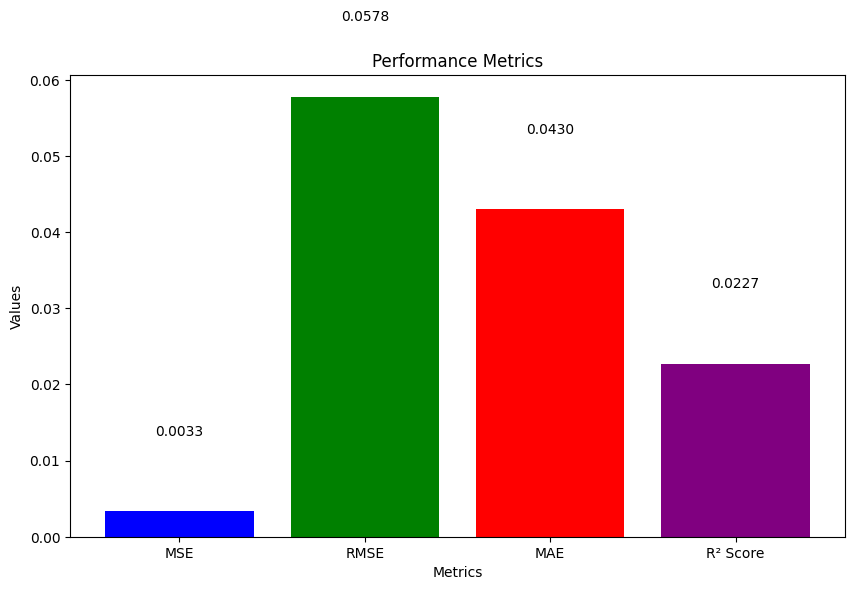

In [72]:
metrics_names = ['MSE', 'RMSE', 'MAE', 'R² Score']
metrics_values = [mse, rmse, mae, r_squared]

# Plotting the metrics
plt.figure(figsize=(10, 6))
plt.bar(metrics_names, metrics_values, color=['blue', 'green', 'red', 'purple'])
plt.title('Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')
for i, v in enumerate(metrics_values):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', color='black')
plt.show()


**Random Forest**

Performance Metrics for Random Forest Regressor:
Mean Squared Error: 0.0033
Root Mean Squared Error: 0.0576
Mean Absolute Error: 0.0428
R² Score: 0.0298

Feature Importances:
temp: 0.0164
feelslike: 0.0115
dew: 0.0145
humidity: 0.1028
precip: 0.0389
windspeed: 0.0763
visibility: 0.0780
day_of_week: 0.1821
is_weekend: 0.2831
time_of_day_Afternoon: 0.1242
time_of_day_Evening: 0.0365
time_of_day_Morning: 0.0173
time_of_day_Night: 0.0182


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


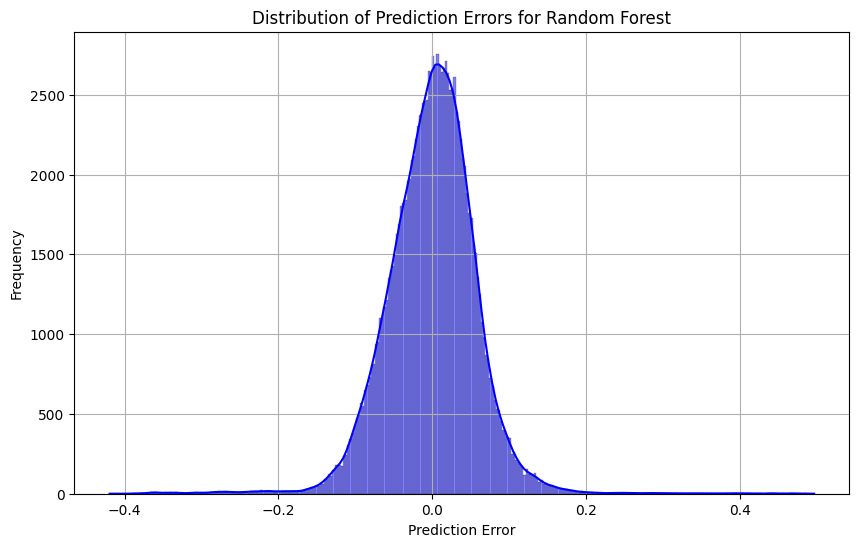

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt


X_train, X_test, y_train, y_test = train_test_split(x_scaled_df, y_log_scaled_df, test_size=0.2, random_state=42)


random_forest = RandomForestRegressor(n_estimators=300, random_state=42)

# Fit the model on the training data
random_forest.fit(X_train, y_train.values.ravel())  # Ensure y_train is in the correct shape

# Predict on the test set
y_pred = random_forest.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# Display performance metrics
print("Performance Metrics for Random Forest Regressor:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r_squared:.4f}")

# Feature Importances
print("\nFeature Importances:")
features_importances = random_forest.feature_importances_
for feature, importance in zip(x_scaled_df.columns, features_importances):
    print(f"{feature}: {importance:.4f}")

# If y_test is a DataFrame or Series, convert it to a numpy array and flatten it to match y_pred
if y_test.ndim > 1:
    y_test = y_test.values.ravel()  # This will convert it to a one-dimensional array

# Now, calculate the prediction errors
errors = y_test - y_pred

# Continue with your analysis or visualization
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True, color='blue')
plt.title('Distribution of Prediction Errors for Random Forest')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


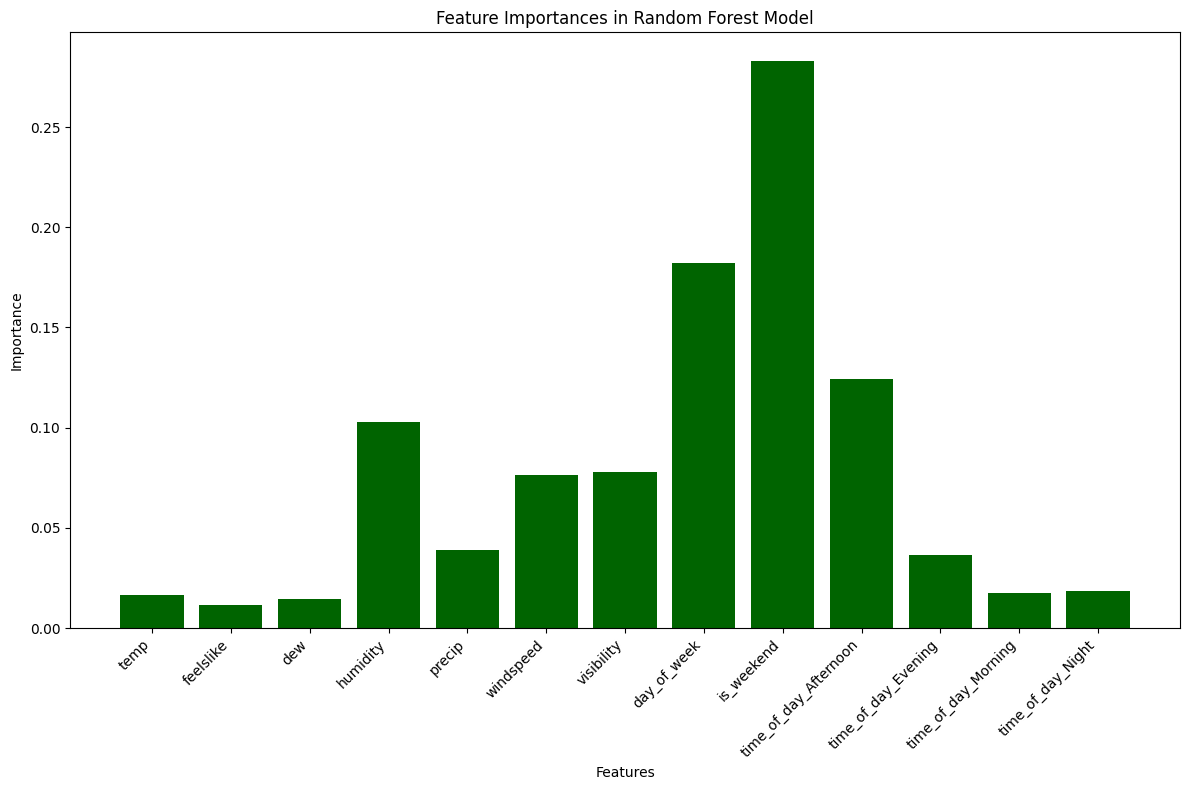

In [74]:
features_importances = random_forest.feature_importances_
features = X_train.columns

# Create a bar chart of the feature importances
plt.figure(figsize=(12, 8))
plt.bar(features, features_importances, color='darkgreen')
plt.title('Feature Importances in Random Forest Model')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')  # Rotate feature names for better visibility
plt.tight_layout()
plt.show()

**Nueral Networks**

In [75]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.optimizers import Nadam
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.metrics import MeanAbsoluteError, MeanSquaredError
import numpy as np


X_train, X_test, y_train, y_test = train_test_split(x_scaled_df, y_log_scaled_df, test_size=0.2, random_state=42)

# Build the neural network model
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer: 1 neuron, no activation function for regression
])

# Compile the model
model.compile(optimizer=Nadam(learning_rate=0.001), loss='mse',metrics=[MeanAbsoluteError(), MeanSquaredError()])

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(
    X_train, y_train, 
    epochs=15, 
    validation_split=0.2, 
    verbose=1, 
    callbacks=[early_stopping]
)

# Evaluate the model on the test set
mse = model.evaluate(X_test, y_test)
print(f"Test MSE: {mse}")

# Predictions
y_pred = model.predict(X_test)


Epoch 1/15


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12222/12222 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - loss: 0.0300 - mean_absolute_error: 0.0466 - mean_squared_error: 0.0042 - val_loss: 0.0035 - val_mean_absolute_error: 0.0438 - val_mean_squared_error: 0.0035
Epoch 2/15
12222/12222 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 0.0035 - mean_absolute_error: 0.0438 - mean_squared_error: 0.0035 - val_loss: 0.0035 - val_mean_absolute_error: 0.0438 - val_mean_squared_error: 0.0035
Epoch 3/15
12222/12222 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 0.0035 - mean_absolute_error: 0.0438 - mean_squared_error: 0.0035 - val_loss: 0.0036 - val_mean_absolute_error: 0.0443 - val_mean_squared_error: 0.0036
Epoch 4/15
12222/12222 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 0.0035 - mean_absolute_error: 0.0438 - mean_squared_error: 0.0035 - val_loss: 0.0035 - val_mean_absolute_error: 0.0439 - val_mean_squared_error: 0.0035
Epoch 5/15
12222/12222 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 0.0035 - mean_absolute_error: 0.0439 - mean_squared_error: 0.0035 - val_loss: 

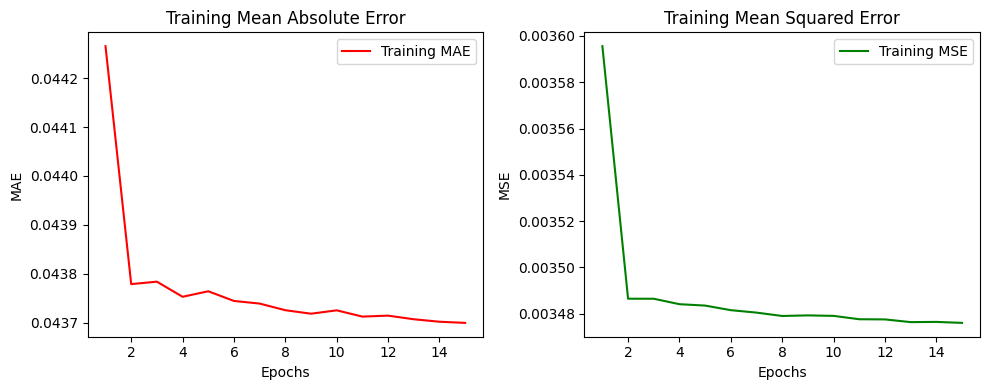

In [81]:
import matplotlib.pyplot as plt

# Extracting the history of training loss
train_loss = history.history['loss']

# Extracting the history of Mean Absolute Error and Mean Squared Error for training
train_mae = history.history['mean_absolute_error']
train_mse = history.history['mean_squared_error']

# Number of epochs actually run
epochs = range(1, len(train_loss) + 1)

# Setting up the plot
plt.figure(figsize=(10, 4))


# Plotting Training Mean Absolute Error
plt.subplot(1, 2, 1)
plt.plot(epochs, train_mae, 'r-', label='Training MAE')
plt.title('Training Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

# Plotting Training Mean Squared Error
plt.subplot(1, 2, 2)
plt.plot(epochs, train_mse, 'g-', label='Training MSE')
plt.title('Training Mean Squared Error')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()

plt.tight_layout()
plt.show()
